In [1]:
import librosa, numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(librosa.ex('trumpet'), duration=2.0)



In [2]:
def generate_sinusoid(duration,sample_rate = 48000):
    """Generate a sinusoid for the specified duration at 48kHz sample rate"""
      # Hz
    frequency = 440  # Hz (A4 note)
    
    # Generate time array
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    
    # Generate sinusoid with some modulation to make it more interesting
    waveform = np.sin(2 * np.pi * frequency * t) * np.exp(-t/20)  # Decaying sinusoid
    
    # Normalize to [-1, 1]
    if len(waveform) > 0:
        waveform = waveform / np.max(np.abs(waveform))
    
    return t, waveform

sample_rate = 48000  # Hz
time_data, waveform_data = generate_sinusoid(18.0, sample_rate=sample_rate)

Slice 1: Time range 3.00 to 6.00 seconds, Waveform length: 144001 samples


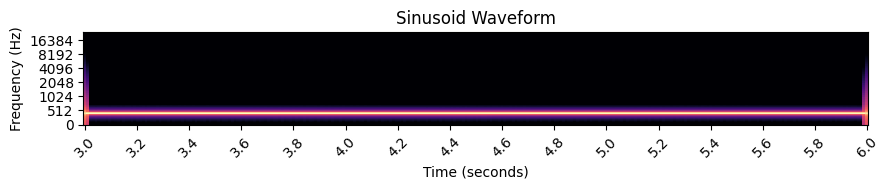

In [22]:
title= 'Sinusoid Waveform'



slice_id = 1

slice_duration = 3  # seconds
sample_rate = 48000

# Calculate slice boundaries
start_sample = slice_id * slice_duration * sample_rate
end_sample = min((slice_id + 1) * slice_duration * sample_rate, len(time_data))

# Extract slice data
slice_time = time_data[start_sample:end_sample+1]
slice_waveform = waveform_data[start_sample:end_sample+1]

# Adjust time to start from 0 for the slice
# slice_time = slice_time - slice_time[0]

print(f"Slice {slice_id}: Time range {slice_time[0]:.2f} to {slice_time[-1]:.2f} seconds, "
      f"Waveform length: {len(slice_waveform)} samples")




fig, ax = plt.subplots(figsize=(9, 2))

S = librosa.feature.melspectrogram(y=slice_waveform, sr=sample_rate, n_mels=128, fmax=24000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax, cmap='magma')
ax.set_title(title)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Frequency (Hz)')
# plt.colorbar(img, ax=ax, format='%+2.0f dB')

# Set x labels and ticks to match the time data passed
zerobased_time = slice_time - slice_time[0]  # Adjust time to start from 0
XAX_FACTOR = 5
ax.set_xticks(zerobased_time[::int(len(zerobased_time)/slice_duration/XAX_FACTOR)])  # Show 10 ticks
ax.set_xticklabels([f"{t:.1f}" for t in slice_time[::int(len(slice_time)/slice_duration/XAX_FACTOR)]], rotation=45)

plt.tight_layout()

plt.show()